**CHALLENGE**
1. Gunakan data customer_churn.csv dari modul sebelumnya.
2. Tentukan best K dari KNN
3. Tentukan Kombinasi Criterion dan Max Depth dan Min Sample Split Terbaik di DT
4. Tentunkan kernel terbaik dari SVM
5. Tentukan solver terbaik dari Logistic Regression
6. Dari semua parameter terbaik diatas, model manakah yang paling cocok untuk di deploy?
7. Jika DT yang terbaik, feature mana yang memberikan pengaruh paling signifikan?

In [12]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('customer_churn.csv')
print("Data shape:", df.shape)
df.head()

Data shape: (1500, 8)


,Tenure,Total_Belanja_3bln,Hari_Terakhir_Login,Sesi_Per_Bulan,Jumlah_Tiket_Komplain,Skor_Kepuasan,Item_Wishlist,Churn
0,34.10,18.57,31.45,67.04,5.89,4.98,18.64,1
1,53.14,33.17,47.51,59.71,8.17,3.57,7.24,0
2,42.23,30.98,45.80,46.99,6.49,5.50,18.05,0
3,30.78,27.27,47.73,60.87,7.11,5.28,14.68,0
4,33.43,14.50,42.93,51.55,7.43,5.55,24.38,1


In [13]:
# Cek info dataset
print(df.info())
print("\nCek missing values:")
print(df.isnull().sum())
print("\nCek distribusi target:")
print(df['Churn'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Tenure                 1500 non-null   float64
 1   Total_Belanja_3bln     1500 non-null   float64
 2   Hari_Terakhir_Login    1500 non-null   float64
 3   Sesi_Per_Bulan         1500 non-null   float64
 4   Jumlah_Tiket_Komplain  1500 non-null   float64
 5   Skor_Kepuasan          1500 non-null   float64
 6   Item_Wishlist          1500 non-null   float64
 7   Churn                  1500 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 93.9 KB
None

Cek missing values:
Tenure                   0
Total_Belanja_3bln       0
Hari_Terakhir_Login      0
Sesi_Per_Bulan           0
Jumlah_Tiket_Komplain    0
Skor_Kepuasan            0
Item_Wishlist            0
Churn                    0
dtype: int64

Cek distribusi target:
Churn
0    751
1    749
Name: count, dtype: 

In [14]:
# Pisahkan feature dan target
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling data (penting untuk KNN dan SVM!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data training:", X_train.shape)
print("Data testing:", X_test.shape)

Data training: (1200, 7)
Data testing: (300, 7)


## 2. Cari Best K untuk KNN

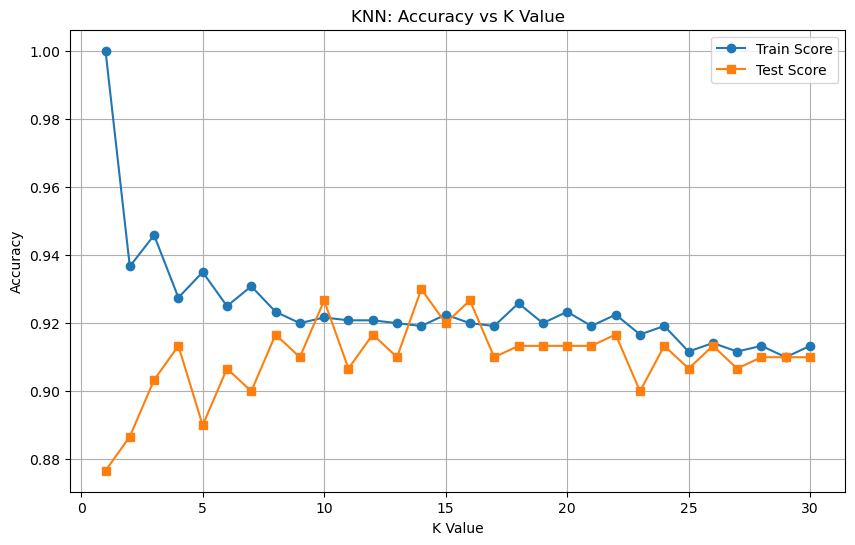


Best K: 14
Best Test Accuracy: 0.9300


In [15]:
# Cobain berbagai nilai K
k_values = range(1, 31)
train_scores = []
test_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_scores.append(knn.score(X_train_scaled, y_train))
    test_scores.append(knn.score(X_test_scaled, y_test))

# Plot hasilnya
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_scores, label='Train Score', marker='o')
plt.plot(k_values, test_scores, label='Test Score', marker='s')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('KNN: Accuracy vs K Value')
plt.legend()
plt.grid(True)
plt.show()

# Cari K terbaik
best_k = list(k_values)[np.argmax(test_scores)]
best_knn_score = max(test_scores)
print(f"\nBest K: {best_k}")
print(f"Best Test Accuracy: {best_knn_score:.4f}")

## 3. Cari Parameter Terbaik untuk Decision Tree

In [16]:
# Grid Search untuk Decision Tree
dt_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10, 15, None],
    'min_samples_split': [2, 5, 10, 20]
}

dt = DecisionTreeClassifier(random_state=42)
dt_grid = GridSearchCV(dt, dt_params, cv=5, scoring='accuracy', n_jobs=-1)
dt_grid.fit(X_train, y_train)

print("Best Parameters:", dt_grid.best_params_)
print(f"Best Cross-Validation Score: {dt_grid.best_score_:.4f}")

# Test dengan best model
best_dt = dt_grid.best_estimator_
dt_pred = best_dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
print(f"Test Accuracy: {dt_accuracy:.4f}")

Best Parameters: {'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 20}
Best Cross-Validation Score: 0.8783
Test Accuracy: 0.8967


## 4. Cari Kernel Terbaik untuk SVM

In [17]:
# Test berbagai kernel SVM
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
svm_results = {}

for kernel in kernels:
    print(f"Testing {kernel} kernel...")
    svm = SVC(kernel=kernel, random_state=42)
    svm.fit(X_train_scaled, y_train)
    score = svm.score(X_test_scaled, y_test)
    svm_results[kernel] = score
    print(f"{kernel}: {score:.4f}\n")

# Cari kernel terbaik
best_kernel = max(svm_results, key=svm_results.get)
best_svm_score = svm_results[best_kernel]
print(f"Best Kernel: {best_kernel}")
print(f"Best Accuracy: {best_svm_score:.4f}")

Testing linear kernel...
linear: 0.9233

Testing rbf kernel...
rbf: 0.9367

Testing poly kernel...
poly: 0.8867

Testing sigmoid kernel...
sigmoid: 0.8033

Best Kernel: rbf
Best Accuracy: 0.9367


## 5. Cari Solver Terbaik untuk Logistic Regression

In [18]:
# Test berbagai solver
solvers = ['lbfgs', 'liblinear', 'saga', 'sag']
lr_results = {}

for solver in solvers:
    print(f"Testing {solver} solver...")
    try:
        lr = LogisticRegression(solver=solver, max_iter=1000, random_state=42)
        lr.fit(X_train_scaled, y_train)
        score = lr.score(X_test_scaled, y_test)
        lr_results[solver] = score
        print(f"{solver}: {score:.4f}\n")
    except:
        print(f"{solver}: Failed\n")

# Cari solver terbaik
best_solver = max(lr_results, key=lr_results.get)
best_lr_score = lr_results[best_solver]
print(f"Best Solver: {best_solver}")
print(f"Best Accuracy: {best_lr_score:.4f}")

Testing lbfgs solver...
lbfgs: 0.9133

Testing liblinear solver...
liblinear: 0.9167

Testing saga solver...
saga: 0.9133

Testing sag solver...
sag: 0.9133

Best Solver: liblinear
Best Accuracy: 0.9167


## 6. Bandingkan Semua Model - Mana yang Paling Cocok untuk Deploy?

SUMMARY - MODEL COMPARISON
KNN                 : 0.9300
Decision Tree       : 0.8967
SVM                 : 0.9367
Logistic Regression : 0.9167


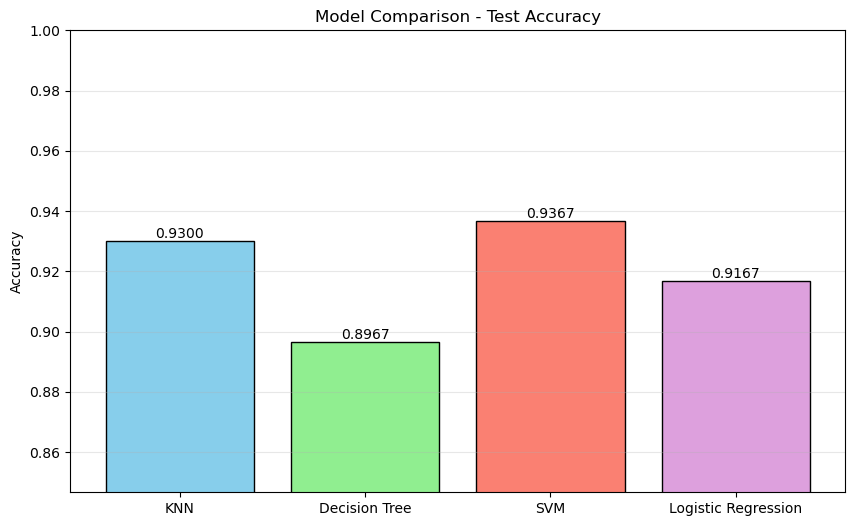


🏆 Model Terbaik untuk di-Deploy: SVM
   Accuracy: 0.9367


In [19]:
# Rangkum semua hasil
results_summary = {
    'KNN': best_knn_score,
    'Decision Tree': dt_accuracy,
    'SVM': best_svm_score,
    'Logistic Regression': best_lr_score
}

print("="*50)
print("SUMMARY - MODEL COMPARISON")
print("="*50)
for model, score in results_summary.items():
    print(f"{model:20s}: {score:.4f}")
print("="*50)

# Visualisasi perbandingan
plt.figure(figsize=(10, 6))
models = list(results_summary.keys())
scores = list(results_summary.values())
colors = ['skyblue', 'lightgreen', 'salmon', 'plum']

bars = plt.bar(models, scores, color=colors, edgecolor='black')
plt.ylabel('Accuracy')
plt.title('Model Comparison - Test Accuracy')
plt.ylim([min(scores) - 0.05, 1.0])

# Tambahin nilai di atas bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.4f}',
             ha='center', va='bottom')

plt.grid(axis='y', alpha=0.3)
plt.show()

# Tentuin model terbaik
best_model = max(results_summary, key=results_summary.get)
print(f"\n🏆 Model Terbaik untuk di-Deploy: {best_model}")
print(f"   Accuracy: {results_summary[best_model]:.4f}")

## 7. Feature Importance dari Decision Tree

Feature Importance dari Decision Tree:
                 Feature  Importance
6          Item_Wishlist    0.363202
0                 Tenure    0.247009
5          Skor_Kepuasan    0.162967
3         Sesi_Per_Bulan    0.083644
2    Hari_Terakhir_Login    0.073559
4  Jumlah_Tiket_Komplain    0.055637
1     Total_Belanja_3bln    0.013983


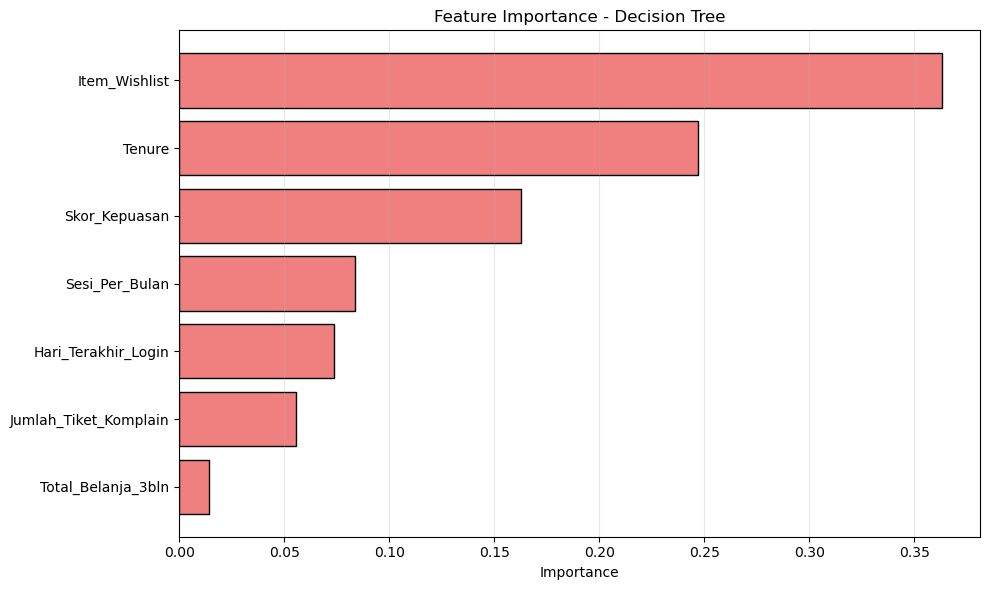


📊 Feature paling berpengaruh: Item_Wishlist
   Importance Score: 0.3632


In [20]:
# Ambil feature importance dari Decision Tree
feature_importance = best_dt.feature_importances_
feature_names = X.columns

# Bikin dataframe buat lebih gampang diliat
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

print("Feature Importance dari Decision Tree:")
print(importance_df)

# Visualisasi
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='lightcoral', edgecolor='black')
plt.xlabel('Importance')
plt.title('Feature Importance - Decision Tree')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n📊 Feature paling berpengaruh: {importance_df.iloc[0]['Feature']}")
print(f"   Importance Score: {importance_df.iloc[0]['Importance']:.4f}")


CLASSIFICATION REPORT - SVM
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       145
           1       0.94      0.94      0.94       155

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



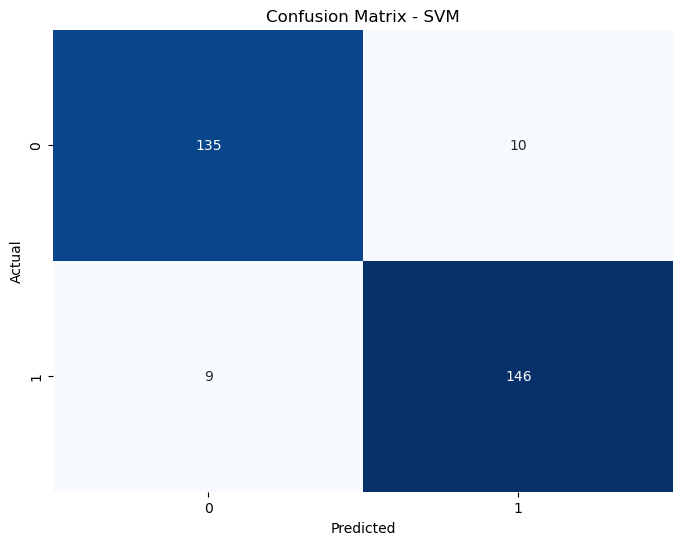

In [21]:
print("\n" + "="*50)
print(f"CLASSIFICATION REPORT - {best_model}")
print("="*50)

if best_model == 'KNN':
    final_model = KNeighborsClassifier(n_neighbors=best_k)
    final_model.fit(X_train_scaled, y_train)
    y_pred = final_model.predict(X_test_scaled)
elif best_model == 'Decision Tree':
    y_pred = dt_pred
elif best_model == 'SVM':
    final_model = SVC(kernel=best_kernel, random_state=42)
    final_model.fit(X_train_scaled, y_train)
    y_pred = final_model.predict(X_test_scaled)
else:  # Logistic Regression
    final_model = LogisticRegression(solver=best_solver, max_iter=1000, random_state=42)
    final_model.fit(X_train_scaled, y_train)
    y_pred = final_model.predict(X_test_scaled)

print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix - {best_model}')
plt.show()